In [116]:
## Part 1: Environment Setup

# Step 1: Add packages
import pandas as pd
import geopandas as gpd
import shapely
from shapely.ops import nearest_points
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os

In [81]:
## Part 1: Environment Setup

# Step 2: Change working directory
os.chdir('/Users/Ben/Desktop/Grad School/Classes/GIS 5571_Spatial Data Science/Final Project/Data')

# Check current working directory
print(os.getcwd())

/Users/Ben/Desktop/Grad School/Classes/GIS 5571_Spatial Data Science/Final Project/Data


In [82]:
## Part 2: Data Setup

# Step 1: Defining input datasets as variables
parcels_full = gpd.read_file("./County_Parcels.shp")
blocks_full = gpd.read_file("./Census2020TigerBlockGroup.shp")
pollution_sources_full = gpd.read_file("./my_neighborhood_sites.shp")

In [83]:
## Part 2: Data Setup

# Step 2: Checking input data's CRS
print(parcels_full.crs)
print(blocks_full.crs)
print(pollution_sources_full.crs)

EPSG:26915
EPSG:26915
EPSG:26915


In [84]:
## Part 2: Data Setup

# Step 3: Randomly sample 1000 parcels from full Hennepin County parcel dataset
parcels_sample = parcels_full.sample(n=1000, random_state=42)
parcels_sample.to_file('./hennepin_parcels_1000sample.shp')
parcels_sample

,OBJECTID,PID,PID_TEXT,DIV_STATUS,FEATURECOD,STATE_CD,TORRENS_TY,HOUSE_NO,FRAC_HOUSE,STREET_NM,...,HMS_EXCL4,NET_TC4,NET_TAX4,LAT,LON,ShapeSTAre,ShapeSTLen,NEAR_FID,NEAR_DIST,geometry
270135,270136,2202824320054,(54),None,501,1870,A,5836,None,HARRIET AVE,...,0,0,0.0,44.896669,-93.286134,752.134694,118.980796,14793,199.678259,"POLYGON ((477428.274 4971502.371, 477387.018 4..."
247554,247555,2002824410119,(119),None,501,2000,T,5904,None,PENN AVE S,...,0,0,0.0,44.896004,-93.309041,651.517543,111.290245,12679,209.763637,"POLYGON ((475618.278 4971452.436, 475618.226 4..."
22027,22028,0302824140214,(214),None,501,1750,A,3345,None,5TH AVE S,...,0,0,0.0,44.941678,-93.268607,466.490936,100.670893,7060,226.917234,"POLYGON ((478827.443 4976502.478, 478815.256 4..."
200526,200527,1702824230123,(123),None,501,1975,T,4916,None,CHOWEN AVE S,...,0,0,0.0,44.913703,-93.325592,772.418510,117.622851,11872,82.294715,"POLYGON ((474319.381 4973425.215, 474319.386 4..."
22134,22135,0302824210167,M,None,502,1825,T,1,None,LAKE ST W,...,0,0,0.0,44.947894,-93.278813,9012.862702,386.886818,13128,50.612284,"POLYGON ((478062.838 4977160.507, 477989.67 49..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16358,16359,0202924230017,(17),None,501,1405,T,3431,None,2ND ST N E,...,0,0,0.0,45.030310,-93.266112,496.739773,105.697517,4731,53.113404,"POLYGON ((479060.347 4986358.762, 479060.306 4..."
207376,207377,1711722130053,(53),None,501,2160,A,16612,None,MINNETONKA BLVD,...,0,0,0.0,44.942201,-93.490660,1392.043239,167.443976,7917,208.604418,"POLYGON ((461286.686 4976677.303, 461301.942 4..."
311448,311449,2511724120215,(215),None,501,2260,T,85,None,ADDRESS UNASSIGNED,...,0,0,0.0,44.917961,-93.652950,7974.989176,424.690521,9802,356.367088,"POLYGON ((448545.949 4974044.008, 448545.636 4..."
205223,205224,1711622240008,(8),None,501,730,T,8003,None,ISLAND RD,...,0,0,0.0,44.857584,-93.493911,1253.352196,147.939389,3521,596.647118,"POLYGON ((461006.478 4967252.206, 460965.969 4..."


In [85]:
## Part 2: Data Setup

# Step 4: Clean parcels_sample data - Select relevant columns for parcel shape and ID
parcels_clean = parcels_sample[['OBJECTID', 'PID', 'PID_TEXT', 'LAT', 'LON', 'ShapeSTAre', 'ShapeSTLen', 'geometry']]

parcels_clean

,OBJECTID,PID,PID_TEXT,LAT,LON,ShapeSTAre,ShapeSTLen,geometry
270135,270136,2202824320054,(54),44.896669,-93.286134,752.134694,118.980796,"POLYGON ((477428.274 4971502.371, 477387.018 4..."
247554,247555,2002824410119,(119),44.896004,-93.309041,651.517543,111.290245,"POLYGON ((475618.278 4971452.436, 475618.226 4..."
22027,22028,0302824140214,(214),44.941678,-93.268607,466.490936,100.670893,"POLYGON ((478827.443 4976502.478, 478815.256 4..."
200526,200527,1702824230123,(123),44.913703,-93.325592,772.418510,117.622851,"POLYGON ((474319.381 4973425.215, 474319.386 4..."
22134,22135,0302824210167,M,44.947894,-93.278813,9012.862702,386.886818,"POLYGON ((478062.838 4977160.507, 477989.67 49..."
...,...,...,...,...,...,...,...,...
16358,16359,0202924230017,(17),45.030310,-93.266112,496.739773,105.697517,"POLYGON ((479060.347 4986358.762, 479060.306 4..."
207376,207377,1711722130053,(53),44.942201,-93.490660,1392.043239,167.443976,"POLYGON ((461286.686 4976677.303, 461301.942 4..."
311448,311449,2511724120215,(215),44.917961,-93.652950,7974.989176,424.690521,"POLYGON ((448545.949 4974044.008, 448545.636 4..."
205223,205224,1711622240008,(8),44.857584,-93.493911,1253.352196,147.939389,"POLYGON ((461006.478 4967252.206, 460965.969 4..."


In [86]:
## Part 3: Data Analysis

# Step 1: Calculate quantity of pollution source points within polygon, and if zero, distance to nearest pollution source

# Define the function
def calculate_within_and_nearest_distance(parcel, points):
    # Count points within the parcel polygon
    points_within = points[points.within(parcel)]
    count_within = len(points_within)
    
    if count_within > 0:
        return count_within, 0.0  # Return the count and zero distance if points are within the polygon
    
    # If no points are within, calculate the distance to the nearest point using union_all()
    nearest_geom = nearest_points(parcel, points.geometry.union_all())[1]
    distance_to_nearest = parcel.distance(nearest_geom)
    return count_within, distance_to_nearest

# Apply the function to each parcel in parcels_sample
parcels_clean[['pollut_within', 'pollut_distance']] = parcels_clean['geometry'].apply(
    calculate_within_and_nearest_distance, points=pollution_sources_full
).apply(pd.Series)

# Save the updated parcels_sample
parcels_clean.to_file("./parcels_with_pollution_count_and_distance.shp")
parcels_clean

/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/xk/wyb749tx4c3fk4rfqlw43hnc0000gn/T/ipykernel_2915/342640353.py:25: UserWarning: Column names longer than 10 characters will be tru

,OBJECTID,PID,PID_TEXT,LAT,LON,ShapeSTAre,ShapeSTLen,geometry,pollut_within,pollut_distance
270135,270136,2202824320054,(54),44.896669,-93.286134,752.134694,118.980796,"POLYGON ((477428.274 4971502.371, 477387.018 4...",0.0,168.639453
247554,247555,2002824410119,(119),44.896004,-93.309041,651.517543,111.290245,"POLYGON ((475618.278 4971452.436, 475618.226 4...",0.0,209.763637
22027,22028,0302824140214,(214),44.941678,-93.268607,466.490936,100.670893,"POLYGON ((478827.443 4976502.478, 478815.256 4...",0.0,132.626169
200526,200527,1702824230123,(123),44.913703,-93.325592,772.418510,117.622851,"POLYGON ((474319.381 4973425.215, 474319.386 4...",0.0,82.294715
22134,22135,0302824210167,M,44.947894,-93.278813,9012.862702,386.886818,"POLYGON ((478062.838 4977160.507, 477989.67 49...",0.0,11.977917
...,...,...,...,...,...,...,...,...,...,...
16358,16359,0202924230017,(17),45.030310,-93.266112,496.739773,105.697517,"POLYGON ((479060.347 4986358.762, 479060.306 4...",0.0,53.113404
207376,207377,1711722130053,(53),44.942201,-93.490660,1392.043239,167.443976,"POLYGON ((461286.686 4976677.303, 461301.942 4...",0.0,22.092857
311448,311449,2511724120215,(215),44.917961,-93.652950,7974.989176,424.690521,"POLYGON ((448545.949 4974044.008, 448545.636 4...",0.0,356.367088
205223,205224,1711622240008,(8),44.857584,-93.493911,1253.352196,147.939389,"POLYGON ((461006.478 4967252.206, 460965.969 4...",0.0,596.647118


In [87]:
## Part 3: Data Analysis

# Step 2 - Poverty Data: Load in PovertyTract.csv, selecting specific columns and filtering for Hennepin County
poverty_data_full = pd.read_csv(
    'PovertyTract2019.csv',
    usecols=['FIPS', 'PrimaryCounty', 'AllAgesCount', 'AllAgesPct', 'AllAgesSigText']
)

# Filter to include only rows where 'PrimaryCounty' is 'Hennepin'
poverty_data = poverty_data[poverty_data['PrimaryCounty'] == 'Hennepin']

# Rename columns
poverty_data.rename(columns={
    'FIPS': 'povdata_FIPS',
    'AllAgesCount': 'Num_in_Pov',
    'AllAgesPct': 'Pct_in_Pov',
    'AllAgesSigText': 'Comp_to_State'
}, inplace=True)

poverty_data

,povdata_FIPS,PrimaryCounty,Num_in_Pov,Pct_in_Pov,Comp_to_State
377,27053000101,Hennepin,399.0,12.3,Same as Minnesota
378,27053000102,Hennepin,1475.0,28.7,Higher than Minnesota
379,27053000300,Hennepin,554.0,17.3,Higher than Minnesota
380,27053000601,Hennepin,541.0,10.8,Same as Minnesota
381,27053000603,Hennepin,180.0,6.3,Same as Minnesota
...,...,...,...,...,...
671,27053125900,Hennepin,1510.0,32.4,Higher than Minnesota
672,27053126000,Hennepin,2325.0,44.4,Higher than Minnesota
673,27053126100,Hennepin,1269.0,17.8,Higher than Minnesota
674,27053126200,Hennepin,777.0,12.4,Higher than Minnesota


In [88]:
## Part 3: Data Analysis

# Step 3 - Poverty Data: Join poverty data to Census Tract shapefile

# Load the Census 2020 Tract shapefile
census_tracts = gpd.read_file('./Census2020TigerTract.shp')

# Perform the join based on the 'povdata_FIPS' and 'GEOID20' columns
poverty_data['povdata_FIPS'] = poverty_data['povdata_FIPS'].astype(str)
census_tracts['GEOID20'] = census_tracts['GEOID20'].astype(str)

# Merge the datasets
cen_tract_poverty = census_tracts.merge(poverty_data, left_on='GEOID20', right_on='povdata_FIPS', how='right')

# Output the merged GeoDataFrame as a new shapefile
cen_tract_poverty.to_file("./cen_tract_poverty.shp")

cen_tract_poverty

/var/folders/xk/wyb749tx4c3fk4rfqlw43hnc0000gn/T/ipykernel_2915/2318201195.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  cen_tract_poverty.to_file("./cen_tract_poverty.shp")
/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'povdata_FIPS' to 'povdata_FI'
  ogr_write(
/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'PrimaryCounty' to 'PrimaryCou'
  ogr_write(
/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'Comp_to_State' to 'Comp_to_St'
  ogr_write(


,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape_Leng,Shape_Area,geometry,povdata_FIPS,PrimaryCounty,Num_in_Pov,Pct_in_Pov,Comp_to_State
0,27,053,000101,27053000101,1.01,Census Tract,G5020,S,2001537.0,0.0,+45.0454917,-093.3086485,5808.645493,1.999965e+06,"POLYGON ((474841.287 4988693.296, 474940.976 4...",27053000101,Hennepin,399.0,12.3,Same as Minnesota
1,27,053,000102,27053000102,1.02,Census Tract,G5020,S,2329304.0,160200.0,+45.0430125,-093.2895130,6605.969139,2.487550e+06,"POLYGON ((476427.104 4988296.088, 476435.011 4...",27053000102,Hennepin,1475.0,28.7,Higher than Minnesota
2,27,053,000300,27053000300,3,Census Tract,G5020,S,1016694.0,0.0,+45.0297772,-093.3135562,4133.593528,1.015896e+06,"POLYGON ((474889.658 4986938.774, 474990.559 4...",27053000300,Hennepin,554.0,17.3,Higher than Minnesota
3,27,053,000601,27053000601,6.01,Census Tract,G5020,S,3785112.0,0.0,+45.0265683,-093.2503049,8271.772490,3.782112e+06,"POLYGON ((479203.857 4986050.644, 479210.554 4...",27053000601,Hennepin,541.0,10.8,Same as Minnesota
4,27,053,000603,27053000603,6.03,Census Tract,G5020,S,1298100.0,0.0,+45.0282496,-093.2316300,4991.709621,1.297073e+06,"POLYGON ((481318.981 4985649.957, 481318.993 4...",27053000603,Hennepin,180.0,6.3,Same as Minnesota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,27,053,125900,27053125900,1259,Census Tract,G5020,S,1049910.0,0.0,+44.9534648,-093.2470011,4502.528389,1.049079e+06,"POLYGON ((480083.117 4977433.06, 480083.504 49...",27053125900,Hennepin,1510.0,32.4,Higher than Minnesota
295,27,053,126000,27053126000,1260,Census Tract,G5020,S,987365.0,0.0,+44.9539066,-093.2672888,4455.590656,9.865842e+05,"POLYGON ((478336.986 4977310.429, 478337.366 4...",27053126000,Hennepin,2325.0,44.4,Higher than Minnesota
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,27053126100,Hennepin,1269.0,17.8,Higher than Minnesota
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,27053126200,Hennepin,777.0,12.4,Higher than Minnesota


In [89]:
## Part 3: Data Analysis

# Step 4 - Pollution and Poverty Data: Join Census Tract/Poverty dataset to parcels_clean
parcels_pollution_poverty = gpd.sjoin(parcels_clean, cen_tract_poverty, how='left', predicate='intersects')

# Aggregate based on highest Pct_in_Pov while retaining original parcels
# Group by 'PID' and aggregate by max Pct_in_Pov
parcels_pollution_poverty_aggregated = parcels_pollution_poverty.groupby('PID').agg(
    {'Pct_in_Pov': 'max',
     'Num_in_Pov': 'max',
     'Comp_to_State': 'first'}
).reset_index()

# Merge back to original parcels_clean to ensure all parcels are retained
parcels_updated = parcels_clean.merge(parcels_pollution_poverty_aggregated, on='PID', how='left')

parcels_updated

,OBJECTID,PID,PID_TEXT,LAT,LON,ShapeSTAre,ShapeSTLen,geometry,pollut_within,pollut_distance,Pct_in_Pov,Num_in_Pov,Comp_to_State
0,270136,2202824320054,(54),44.896669,-93.286134,752.134694,118.980796,"POLYGON ((477428.274 4971502.371, 477387.018 4...",0.0,168.639453,25.8,1538.0,Higher than Minnesota
1,247555,2002824410119,(119),44.896004,-93.309041,651.517543,111.290245,"POLYGON ((475618.278 4971452.436, 475618.226 4...",0.0,209.763637,4.6,277.0,Same as Minnesota
2,22028,0302824140214,(214),44.941678,-93.268607,466.490936,100.670893,"POLYGON ((478827.443 4976502.478, 478815.256 4...",0.0,132.626169,16.8,458.0,Higher than Minnesota
3,200527,1702824230123,(123),44.913703,-93.325592,772.418510,117.622851,"POLYGON ((474319.381 4973425.215, 474319.386 4...",0.0,82.294715,5.5,184.0,Same as Minnesota
4,22135,0302824210167,M,44.947894,-93.278813,9012.862702,386.886818,"POLYGON ((478062.838 4977160.507, 477989.67 49...",0.0,11.977917,27.1,1085.0,Higher than Minnesota
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16359,0202924230017,(17),45.030310,-93.266112,496.739773,105.697517,"POLYGON ((479060.347 4986358.762, 479060.306 4...",0.0,53.113404,10.1,185.0,Same as Minnesota
996,207377,1711722130053,(53),44.942201,-93.490660,1392.043239,167.443976,"POLYGON ((461286.686 4976677.303, 461301.942 4...",0.0,22.092857,3.7,128.0,Same as Minnesota
997,311449,2511724120215,(215),44.917961,-93.652950,7974.989176,424.690521,"POLYGON ((448545.949 4974044.008, 448545.636 4...",0.0,356.367088,4.8,261.0,Same as Minnesota
998,205224,1711622240008,(8),44.857584,-93.493911,1253.352196,147.939389,"POLYGON ((461006.478 4967252.206, 460965.969 4...",0.0,596.647118,0.7,28.0,Lower than Minnesota


In [102]:
## Part 4: Assigning values and ranking parcels

# Step 1: Define scoring functions/criteria

# Looking at two variables, pollution and poverty

# Pollution looks at pollut_within, where higher values are more valuable
# If pollut_within = zero, then looks at pollut_distance, where lower values are more valuable
def calculate_pollution_score(pollut_within, pollut_distance):
    # Handle NaN values by returning a score of 0
    if pd.isna(pollut_within) or pd.isna(pollut_distance):
        return 0
    
    if pollut_within > 0:
        # Scale pollution count to a score between 0 and 10
        return (pollut_within / parcels_updated['pollut_within'].max()) * 10
    else:
        # Handle cases where pollut_distance is NaN
        if pd.isna(pollut_distance):
            return 0
        
        # Scale pollution distance to a score between 0 and 10
        max_distance = parcels_updated['pollut_distance'].max()
        return 10 - (pollut_distance / max_distance * 10)  # Inverse, lower is better

# Poverty looks at Pct_in_Pov, where higher values are more valuable
def calculate_poverty_score(pct_in_pov):
    # Handle NaN values by returning a score of 0
    if pd.isna(pct_in_pov):
        return 0
    # Scale poverty percentage to a score between 0 and 10
    return (pct_in_pov / 100) * 10

In [103]:
## Part 4: Assigning values and ranking parcels

# Step 2: Calculate and normalize scores 

# Pollution score
# Apply pollution score function using a lambda to check both conditions
parcels_updated['Pollution_Score'] = parcels_updated.apply(
    lambda row: calculate_pollution_score(row['pollut_within'], row['pollut_distance']), axis=1
)

# Poverty score
parcels_updated['Poverty_Score'] = parcels_updated['Pct_in_Pov'].apply(calculate_poverty_score)

In [105]:
## Part 4: Assigning values and ranking parcels

# Step 3: Combine scores
# Define weights
w_pollut = 0.5  # Weight for pollution
w_pov = 0.5  # Weight for poverty

# Fill NaN values for scores before combining
parcels_updated['Poverty_Score'] = parcels_updated['Poverty_Score'].fillna(0)
parcels_updated['Pollution_Score'] = parcels_updated['Pollution_Score'].fillna(0)

# Calculate the combined suitability score
parcels_updated['Suitability_Score'] = (w_pollut * parcels_updated['Poverty_Score'] +
                                         w_pov * parcels_updated['Pollution_Score'])

In [106]:
## Part 4: Assigning values and ranking parcels

# Step 4: Rank the suitability scores from 1 to 1000
parcels_updated['Suitability_Rank'] = parcels_updated['Suitability_Score'].rank(method='min', ascending=False).astype(int)

# Sort by rank
parcels_updated.sort_values(by='Suitability_Rank', inplace=True)

# Display the DataFrame with the new rank column
print(parcels_updated[['PID', 'Suitability_Score', 'Suitability_Rank']])

               PID  Suitability_Score  Suitability_Rank
574  3402924140052           7.189710                 1
127  2602924340142           7.165281                 2
439  3502924110019           6.982927                 3
214  2602924430186           6.892313                 4
369  3402924430099           6.834353                 5
..             ...                ...               ...
425  2302924320276           0.714286               990
199  0411822140033           0.714286               990
933  2502924220142           0.714286               990
977  2202924130438           0.714286               990
642  1911824240004           0.245000              1000

[1000 rows x 3 columns]


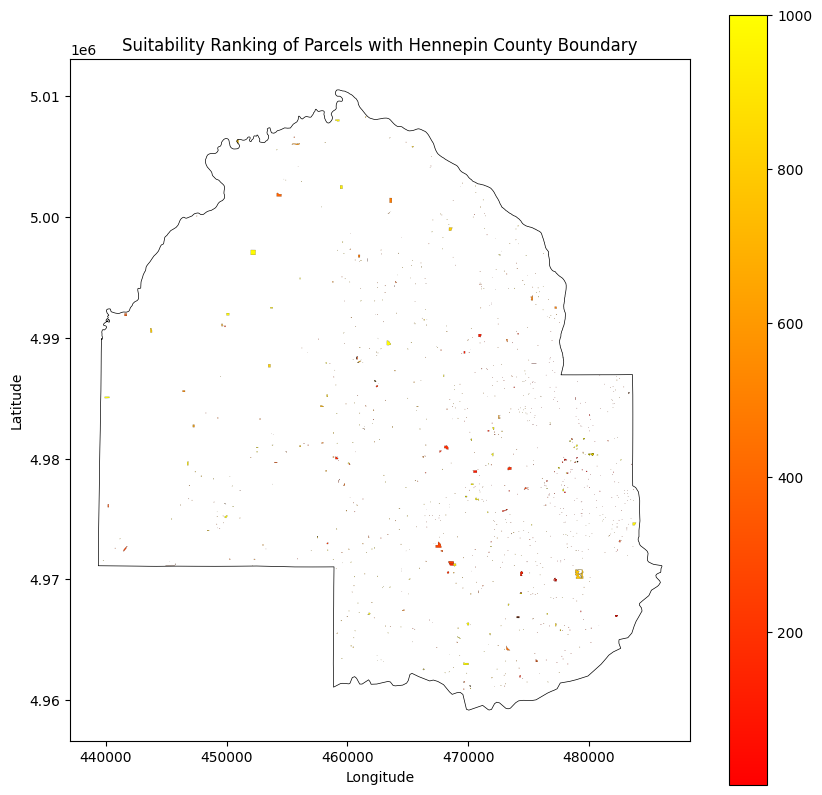

In [118]:
## Part 5: Plot results 

# Load the Hennepin County boundary shapefile
county_boundary = gpd.read_file("./Hennepin_County_boundary.shp")

# Ensure parcels_updated is a GeoDataFrame
parcels_updated = gpd.GeoDataFrame(parcels_updated)

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Define a yellow to red gradient colormap
cmap = LinearSegmentedColormap.from_list("red_yellow", ["red", "yellow"])

# Plot the GeoDataFrame using the ranking column
parcels_updated.plot(column='Suitability_Rank', cmap=cmap, linewidth=0.1, ax=ax, edgecolor='black', legend=True)

# Plot the county boundary on the same axis
county_boundary.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Add titles and labels
plt.title('Suitability Ranking of Parcels with Hennepin County Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()
